***
# <font color=blue size=10>Exercícios</font>
***

## Exercícios Estatística

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios mais atual que a utilizada em nossos experimentos.

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.



# <font color=blue>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [4]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [5]:
dados = pd.read_csv('dados.csv')

dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Visualize o conteúdo do DataFrame

In [6]:
print(dados.info())
dados.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              76840 non-null  int64  
 1   Sexo            76840 non-null  int64  
 2   Idade           76840 non-null  int64  
 3   Cor             76840 non-null  int64  
 4   Anos de Estudo  76840 non-null  int64  
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 4.1 MB
None


,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
count,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000
mean,31.912962,0.307002,44.071421,5.032613,9.469664,2000.383199,1.699512
std,11.147830,0.461253,12.480583,2.857118,4.539929,3323.387730,0.079717
min,11.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.339245
25%,25.000000,0.000000,34.000000,2.000000,6.000000,788.000000,1.645785
50%,31.000000,0.000000,43.000000,4.000000,11.000000,1200.000000,1.699325
75%,41.000000,1.000000,53.000000,8.000000,12.000000,2000.000000,1.753062
max,53.000000,1.000000,99.000000,8.000000,17.000000,200000.000000,2.028497


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [7]:
sm:float = 788.00

classes_renda = [0,2*sm,5*sm,15*sm,25*sm,np.inf]


### 2º Definir os labels das classes

In [8]:
labels_renda = ["E","D","C","B","A"]

### 3º Construir a coluna de frequências

In [9]:
dados['classes_renda'] = pd.cut(dados['Renda'], bins=classes_renda, labels=labels_renda, right=False)
frequencias = dados['classes_renda'].value_counts().reindex(labels_renda)
frequencias

classes_renda
E    49357
D    18972
C     7268
B      823
A      420
Name: count, dtype: int64

### 4º Construir a coluna de percentuais

In [10]:
percentuais = dados['classes_renda'].value_counts(normalize=True).reindex(labels_renda)*100
percentuais

classes_renda
E    64.233472
D    24.690265
C     9.458615
B     1.071057
A     0.546590
Name: proportion, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [11]:
tabela_frequencia_percentual = pd.DataFrame({'Frequência': frequencias, 'Percentual': percentuais})
print(tabela_frequencia_percentual)

               Frequência  Percentual
classes_renda                        
E                   49357   64.233472
D                   18972   24.690265
C                    7268    9.458615
B                     823    1.071057
A                     420    0.546590


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

C:\Users\João Lucas\AppData\Local\Temp\ipykernel_18668\4248735357.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(f'{tabela_frequencia_percentual["Frequência"][pos]}',  # Formatação com 1 casa decimal


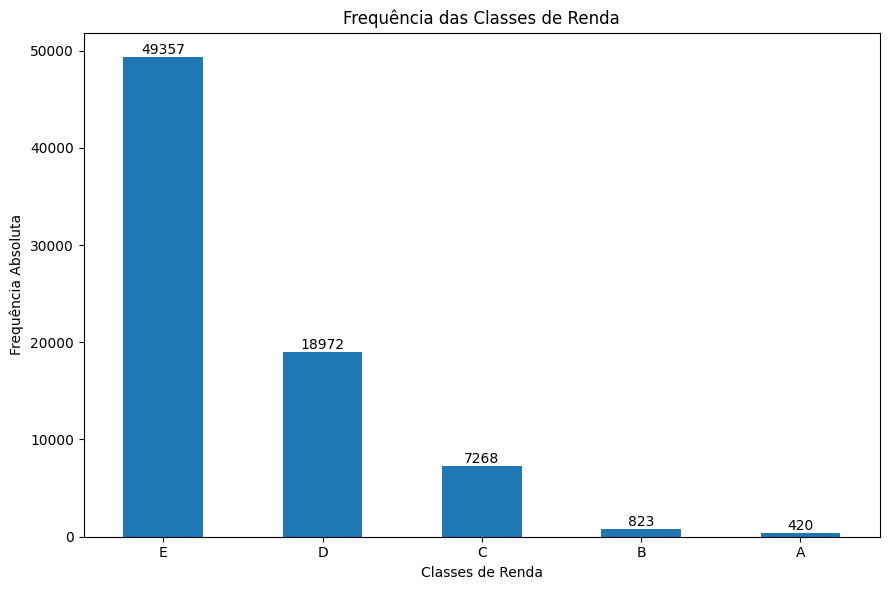

In [12]:
plt.figure(figsize=(9,6))
ax = tabela_frequencia_percentual['Frequência'].plot(kind='bar')
plt.title('Frequência das Classes de Renda')
plt.xlabel('Classes de Renda')
plt.ylabel('Frequência Absoluta')
plt.xticks(rotation=0)


pos = 0
for p in ax.patches:
    ax.annotate(f'{tabela_frequencia_percentual["Frequência"][pos]}',  # Formatação com 1 casa decimal
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')
    pos += 1

plt.tight_layout()
plt.show()

> ### Conclusões

Após a conclusão das etapas deste exercício, pode-se observar que a classe E predomina em meio à sociedade brasileira, com aproximadamente 65% da população recebendo menos do que 2 salários minímos, enquanto apenas 0.5% vivem com mais do que 25 salários mínimos, escancarando o tamanho da disparidade salarial presente dentro de um mesmo país.

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

<Figure size 1200x800 with 0 Axes>

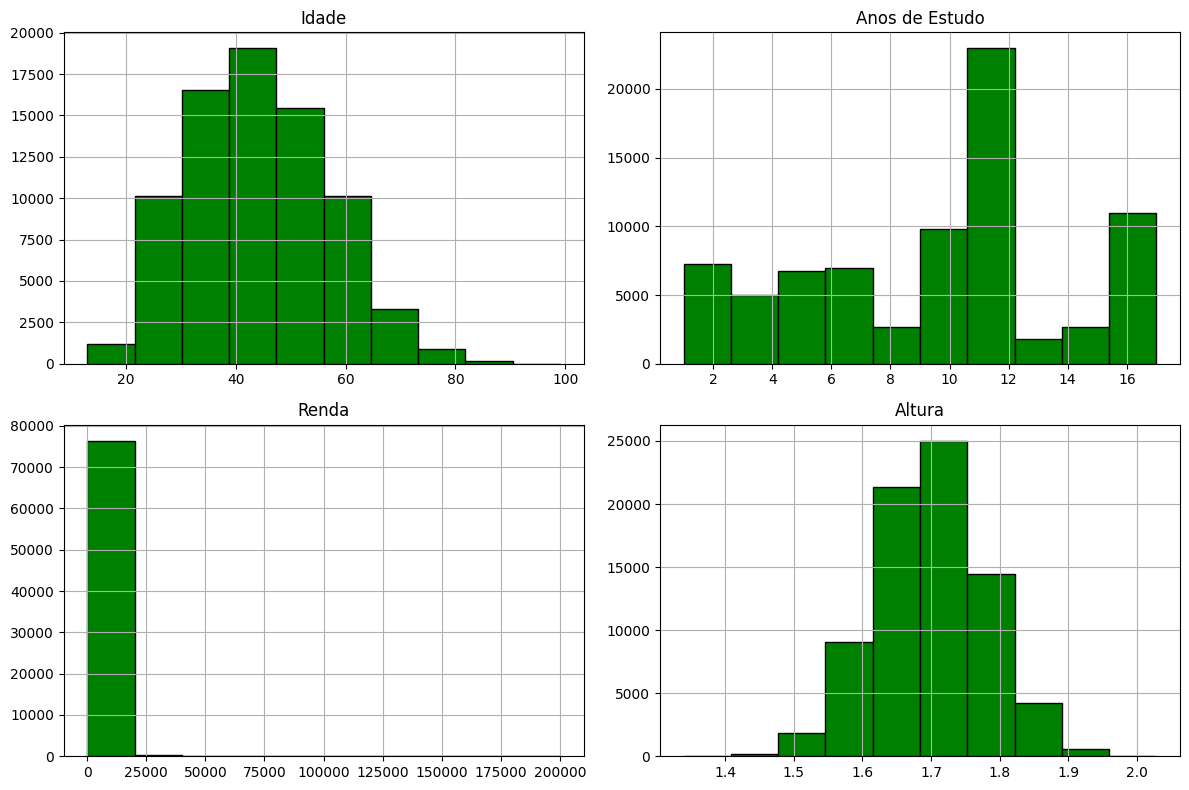

In [13]:
variaveis_quantitativas = ['Idade','Anos de Estudo','Renda','Altura']
plt.figure(figsize=(12,8))
dados[variaveis_quantitativas].hist(bins=10, figsize=(12,8), layout=(2,2), color='green', edgecolor='black')
plt.tight_layout()
plt.show()

> ### Conclusões

Podemos tirar as seguintes conclusões para cada um dos histogramas apresentados:

 - IDADE: A maioria dos indivíduos está na faixa dos 30 aos 50 anos, uma faixa onde a tendência é que sejam pessoas já trabalhando ou estudando. O número de crianças e idosos neste dataset é inferior comparado ao número de indivíduos em idade ativa.
 - ANOS DE ESTUDO: A maioria dos indivíduos possui cerca de 11 a 12 anos de estudo, revelando que grande parte da população concluiu o ensino médio, embora as ocorrências de indivíduos que abandonam a escola antes desta etapa se expressam em quantidades que não pode ser ignorada, revelando a tendência presente na sociedade brasileira de não conclusão do ensino médio para trabalhar.
 - RENDA: Nota-se a massiva quantidade de indíviduos que recebem menos do que 25000, enquanto são raros os casos de pessoas que ultrapassam essa linha.
 - ALTURA: A maior parte dos indivíduos estão entre 1.70 e 1.80, coicidindo com a altura padrão de uma pessoa entre os 20 a 50 anos.

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

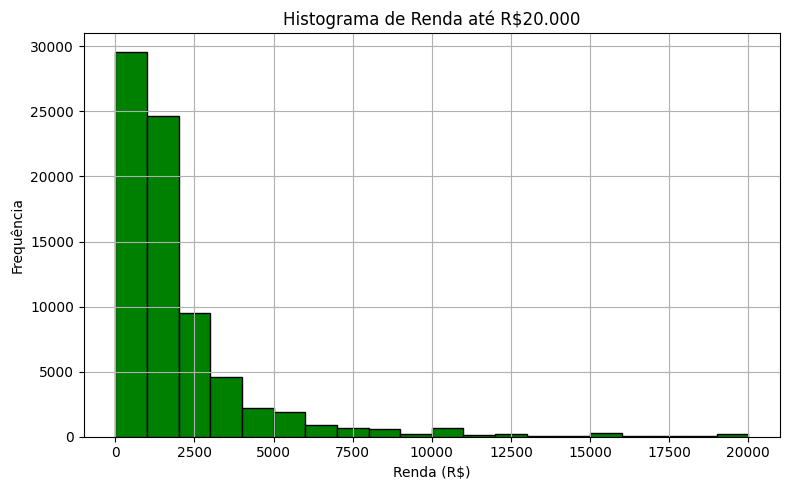

In [14]:
plt.figure(figsize=(8,5))
dados.query('Renda <= 20000')['Renda'].hist(bins=20, color='green', edgecolor='black')
plt.title('Histograma de Renda até R$20.000')
plt.xlabel('Renda (R$)')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [33]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

dados['Sexo_Nome'] = dados['Sexo'].map(sexo)
dados['Cor_Nome'] = dados['Cor'].map(cor)
dados['Anos_Estudo_Nome'] = dados['Anos de Estudo'].map(anos_de_estudo)


uf_map = {
    1: 'Rondônia',1: 'Acre', 3: 'Amazonas', 4: 'Roraima', 5: 'Pará', 6: 'Amapá', 7: 'Tocantins',
    8: 'Maranhão', 9: 'Piauí', 10: 'Ceará',11: 'Rio Grande do Norte',12: 'Paraíba',13: 'Pernambuco',
    14: 'Alagoas',15: 'Sergipe',16: 'Bahia',17: 'Minas Gerais',18: 'Espírito Santo',19: 'Rio de Janeiro',
    20: 'São Paulo',21: 'Paraná', 22: 'Santa Catarina',23: 'Rio Grande do Sul', 24: 'Mato Grosso do Sul',
    25: 'Mato Grosso',26: 'Goiás',27: 'Distrito Federal'
}

dados['UF_Nome'] = dados['UF'].map(uf_map)

In [16]:
tabela_frequencia_sexo_cor = pd.crosstab(dados['Sexo_Nome'], dados['Cor_Nome'])
print(tabela_frequencia_sexo_cor)


Cor_Nome   Amarela  Branca  Indígena  Parda  Preta
Sexo_Nome                                         
Feminino       117    9621       101  10862   2889
Masculino      235   22194       256  25063   5502


In [17]:
tabela_percentual_sexo_cor = pd.crosstab(dados['Sexo_Nome'], dados['Cor_Nome'], normalize='all')*100
print(tabela_percentual_sexo_cor)

Cor_Nome    Amarela     Branca  Indígena      Parda     Preta
Sexo_Nome                                                    
Feminino   0.152264  12.520822  0.131442  14.135867  3.759761
Masculino  0.305830  28.883394  0.333160  32.617126  7.160333


> ### Conclusões

Essa comparação de cores e sexos mostrou que o Brasil é um país predominantemente Pardo, independente do sexo, fato que se explica por conta da miscigenação oriunda da colonização portuguesa e também pelo longo período de escravidão vigente no país.

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [18]:
media_aritmetica = dados['Renda'].mean()
print(media_aritmetica)

2000.3831988547631


### Obtenha a mediana

In [19]:
mediana = dados['Renda'].median()
print(mediana)

1200.0


### Obtenha a moda

In [20]:
moda = dados['Renda'].mode()[0]
print(moda)

788


### Obtenha o desvio médio absoluto

In [21]:
desvio_medio = np.mean(np.abs(dados['Renda'] - dados['Renda'].mean()))
print(desvio_medio)

1526.4951371638058


### Obtenha a variância

In [22]:
variancia = dados['Renda'].var()
print(variancia)

11044906.006217021


### Obtenha o desvio-padrão

In [23]:
desvio_padrao = dados['Renda'].std()
print(desvio_padrao)

3323.3877303464037


### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [24]:
estatisticas_gerais = pd.crosstab(dados['Sexo_Nome'], dados['Cor_Nome'], values=dados['Renda'],
                          aggfunc=['mean','median','max', 'min','std','count'],)
print(estatisticas_gerais)

                  mean                                                      \
Cor_Nome       Amarela       Branca     Indígena        Parda        Preta   
Sexo_Nome                                                                    
Feminino   3027.341880  2109.866750  2464.386139  1176.758516  1134.596400   
Masculino  4758.251064  2925.744435  1081.710938  1659.577425  1603.861687   

           median                                   ...         std  \
Cor_Nome  Amarela  Branca Indígena   Parda   Preta  ...     Amarela   
Sexo_Nome                                           ...               
Feminino   1500.0  1200.0    788.0   800.0   800.0  ...  3731.17366   
Masculino  2800.0  1700.0    797.5  1200.0  1200.0  ...  5740.82482   

                                                                 count         \
Cor_Nome        Branca      Indígena        Parda        Preta Amarela Branca   
Sexo_Nome                                                                       
Feminino  

> ### Conclusões

Aqui nesta tabela, é interessante observar a disparidade entre os valores de média e mediana, relevando que existem valores extremos (outliers) presentes no dataset que elevam a média, ou seja, por conta de poucas pessoas que ganham muito dinheiro, a média está acima da moda.

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [25]:
def getMedidaDispersao(val):
    return np.mean(np.abs(val - np.mean(val)))

medidas_dispersao = pd.crosstab(dados['Sexo_Nome'], dados['Cor_Nome'], values=dados['Renda'],
                          aggfunc=[getMedidaDispersao,'var','std'])
print(medidas_dispersao)

          getMedidaDispersao                                         \
Cor_Nome             Amarela       Branca     Indígena        Parda   
Sexo_Nome                                                             
Feminino         2549.146322  1670.967106  3007.892952   811.580946   
Masculino        3709.597211  2261.012346   798.910889  1125.827704   

                                var                                            \
Cor_Nome        Preta       Amarela        Branca      Indígena         Parda   
Sexo_Nome                                                                       
Feminino   705.453357  1.392166e+07  1.056909e+07  1.429818e+08  2.547960e+06   
Masculino  975.602482  3.295707e+07  2.257002e+07  1.449841e+06  5.345747e+06   

                                std                                          \
Cor_Nome          Preta     Amarela       Branca      Indígena        Parda   
Sexo_Nome                                                                     
F

> ### Conclusões

Escreva suas conclusões aqui...

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [ ]:


filtro = dados.query('Renda < 10000')
plt.figure(figsize=(10,6))
sns.boxplot(data=filtro, x='Sexo_Nome', y='Renda', hue='Cor_Nome')
plt.title('Distribuição da Renda (inferior à R$10k) por Sexo e Cor')
plt.xlabel('Sexo')
plt.ylabel('Renda')
plt.legend(title='Cor', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

> ### Conclusões

Nota-se aqui a disparidade salarial entre homens e mulheres, com homens ganhando mais, mesmo em comparações de homens e mulheres da mesma cor.

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [27]:
from scipy.stats import percentileofscore

percent_inferior_sm = percentileofscore(dados['Renda'], sm)
print(f"% ≤ 1 SM: {percent_inferior_sm:.2f}%")



% ≤ 1 SM: 24.39%


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [28]:
valor_para_99 = dados['Renda'].quantile(0.99)
print(f"Valor que 99% ganham ≤: R$ {valor_para_99:.2f}")

Valor que 99% ganham ≤: R$ 15000.00


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [31]:
estatisticas_renda_ae_sexo = pd.crosstab(dados['Anos_Estudo_Nome'], dados['Sexo_Nome'],
                        values=dados['Renda'], aggfunc=['mean','median','max','std'])
print(estatisticas_renda_ae_sexo)

                                       mean                median            \
Sexo_Nome                          Feminino    Masculino Feminino Masculino   
Anos_Estudo_Nome                                                              
1 ano                            492.771987   895.629047    400.0     788.0   
10 anos                          925.919225  1731.270847    800.0    1218.0   
11 anos                         1286.790889  2117.060504   1000.0    1500.0   
12 anos                         1682.313725  2470.330776   1200.0    1800.0   
13 anos                         1911.730047  3195.099154   1300.0    2400.0   
14 anos                         2226.460457  3706.620269   1600.0    2500.0   
15 anos ou mais                 3899.513231  6134.279790   2800.0    4000.0   
2 anos                           529.911638   931.178986    450.0     788.0   
3 anos                           546.853916  1109.203862    500.0     800.0   
4 anos                           704.279111  1302.32

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [ ]:
df_box = dados.query('Renda < 10000 and Idade == 40')
plt.figure(figsize=(12,6))
sns.boxplot(data=df_box, x='AnosEstudo_Nome', y='Renda', hue='Sexo_Nome')
plt.title('Renda <10k, Idade 40, por Anos de Estudo e Sexo')
plt.xlabel('Anos de Estudo')
plt.ylabel('Renda')
plt.xticks(rotation=45)
plt.legend(title='Sexo', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [34]:
estatisticas_renda_uf = dados.groupby('UF_Nome')['Renda'].agg(['mean','median','max','std'])
print(estatisticas_renda_uf)

                            mean  median    max          std
UF_Nome                                                     
Alagoas              1783.588889  1000.0  20000  2079.659238
Bahia                1861.353516  1200.0  15580  2020.688632
Distrito Federal     1144.552602   788.0  11000  1237.856197
Goiás                1527.079319   900.0  50000  2389.622497
Mato Grosso          1293.370487   788.0  30000  1950.272431
Mato Grosso do Sul   1344.721480   800.0  15500  1651.805500
Minas Gerais         1771.094946  1000.0  60000  2934.590741
Paraná               1019.432009   700.0  30000  1887.816905
Paraíba              1506.091782   900.0  30000  2276.233415
Pernambuco           1445.130100   900.0  22000  1757.935591
Rio Grande do Norte  1789.761223  1200.0  50000  2406.161161
Rio Grande do Sul    1255.403692   789.0  25000  1821.963536
Santa Catarina       1074.550784   750.0  40000  2373.355726
Sergipe              1399.076871   850.0  50000  2053.779555


### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

In [ ]:
filtro = dados.query('Renda < 10000')
plt.figure(figsize=(14,6))
sns.boxplot(data=filtro, x='UF_Nome', y='Renda')
plt.title('Distribuição da Renda (inferior à R$10k) por Unidade da Federação')
plt.xlabel('Unidade da Federação')
plt.ylabel('Renda')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

> ### Conclusões

Há uma clara disparidade entre a distribuição de renda do Sul e Sudeste comparadas ao Norte e Nordeste, revelando as áreas do Brasil onde os profissionais são melhor remunerados e/ou que existem mais oportunidades de emprego.

## Finalizando.

Resolva 3 exercícios de sua escolha do Capítulo 1 do livro **OpenIntro Statistics**

<h2>Stealers, study, components.</h2> 

In a study of the relationship between socio-economic class and unethical
 behavior, 129 University of California undergraduates at Berkeley were asked to identify themselves as
 having low or high social-class by comparing themselves to others with the most(least) money, most(least)
 education, and most (least) respected jobs. They were also presented with a jar of individually wrapped
 candies and informed that the candies were for children in a nearby laboratory, but that they could take
 some if they wanted. After completing some unrelated tasks,participants reported the number of candies
 they had taken.
 (a) Identify the main research question of the study.
 (b) Who are the subjects in this study, and how many are included?
 (c) The study found tha tstudents who were identified a supper class took more candy than others. How many variables were recorded for each subject in the study in order to conclude these findings? State the variables and their types.

(a) 
A principal questão de pesquisa do estudo é investigar se existe uma relação entre a classe socioeconômica autorrelatada (baixa vs. alta) e o comportamento antiético (nesse caso, a quantidade de doces tomados indevidamente pelos participantes).

(b)
Os sujeitos do estudo são 129 estudantes de graduação da Universidade da Califórnia em Berkeley.

(c)
Foram registradas duas variáveis para cada participante:

1. Classe socioeconômica (variável categórica nominal):
 - Valores possíveis: "baixa" ou "alta" (com base na autoclassificação dos participantes).

2. Número de doces tomados (variável quantitativa discreta):
 - Quantidade de doces que cada participante pegou (valores inteiros, como 0, 1, 2, etc.).

Com essas variáveis, os pesquisadores puderam comparar a média de doces tomados entre os grupos (alta vs. baixa classe) e concluir que os estudantes de classe alta tomaram mais doces.

<h2>Cheaters, study components.</h2>
Researchers studying the relationship between honesty, age and selfcontrol conducted an experiment on 160 children between the ages of 5 and 15. Participants reported their
age, sex, and whether they were an only child or not. The researchers asked each child to toss a fair coin
in private and to record the outcome (white or black) on a paper sheet, and said they would only reward
children who report white. The study’s findings can be summarized as follows: “Half the students were
explicitly told not to cheat and the others were not given any explicit instructions. In the no instruction
group probability of cheating was found to be uniform across groups based on child’s characteristics. In the
group that was explicitly told to not cheat, girls were less likely to cheat, and while rate of cheating didn’t
vary by age for boys, it decreased with age for girls.”12
(a) Identify the main research question of the study.
(b) Who are the subjects in this study, and how many are included?
(c) How many variables were recorded for each subject in the study in order to conclude these findings?

(a) 
A principal questão de pesquisa do estudo é investigar como a honestidade (ou a probabilidade de trapacear) em crianças varia de acordo com:
 - Idade,

 - Sexo (gênero),

 - Condição de ser filho único ou não,

 - Efeito de instruções explícitas contra trapaça (comparando grupos com e sem aviso).

O estudo busca entender se fatores como autocontrole, desenvolvimento moral e influências sociais afetam o comportamento desonesto em diferentes idades e gêneros.

(b)
Os sujeitos do estudo são 160 crianças com idades entre 5 e 15 anos.

(c) 
Foram registradas cinco variáveis para cada participante:

 - Idade (variável quantitativa contínua ou discreta, dependendo do tratamento estatístico):

    - Valores: idade em anos (5, 6, ..., 15).

 - Sexo (gênero) (variável categórica nominal):

    - Valores: "menino" ou "menina".

 - Condição de filho único (variável categórica nominal):

    - Valores: "sim" ou "não".

 - Grupo de instrução (variável categórica nominal):

    - Valores: "recebeu instrução explícita para não trapacear" vs. "não recebeu instrução".

- Resultado do lançamento da moeda (honestidade/trapaça) (variável categórica nominal ou binária):

    - Valores: "preto" (possivelmente trapaceou) ou "branco" (honesto).

Variável derivada (implícita no estudo):

Taxa de trapaça (calculada comparando o número de "brancos" relatados acima do esperado pelo acaso).

<h2>Cats on YouTube.</h2>
Suppose you want to estimate the percentage of videos on YouTube that are cat
videos. It is impossible for you to watch all videos on YouTube so you use a random video picker to select
1000 videos for you. You find that 2% of these videos are cat videos. Determine which of the following is an
observation, a variable, a sample statistic (value calculated based on the observed sample), or a population
parameter.
(a) Percentage of all videos on YouTube that are cat videos.
(b) 2%.
(c) A video in your sample.
(d) Whether or not a video is a cat video.

(a) 
Population parameter (parâmetro populacional).

Explicação: Representa a verdadeira proporção (fixa, mas desconhecida) de vídeos de gatos em toda a população de vídeos do YouTube. Como não podemos observar todos os vídeos, esse valor é teórico e estimado a partir da amostra.

(b) 
Sample statistic (estatística amostral).

Explicação: É o valor calculado com base na amostra de 1000 vídeos (2% deles eram de gatos). Serve como estimativa do parâmetro populacional.

(c)
Observation (observação).

Explicação: Corresponde a uma unidade individual (um vídeo específico) dentro da amostra coletada.

(d)
Variable (variável).

Explicação: É a característica medida para cada vídeo na amostra. Trata-se de uma variável categórica binária (valores: "sim" ou "não").